## 5.1
Integration using a weight function:

$\int_0^{\infty} \frac{1}{1+x^2} = \frac{\pi}{4}$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [4]:
exact = 0.78540


def func(x):
    return 1.0/(1.0+x**2)



In [5]:
#with a weight function w(x) = 1

N = 100;

sumF = 0;
sumF2 = 0;

for i in range(N):
    FX = func(random.random())
    sumF = sumF + FX;
    sumF2 = sumF2 + FX**2

In [6]:
Favg = sumF/N
F2avg = sumF2/N
sigma = np.sqrt((F2avg-Favg**2)/N)

In [7]:
Favg

0.7830453312962554

In [8]:
sigma

0.014885957513852941

In [9]:
def w(x): #A better wave function
    return (4-2*x)/3



In [10]:
def xinv(x):
    return 2 - np.sqrt(4-3*x) 

In [11]:
def evaluate(N):
    #Evaluate the integral and sigma for various values of N
    sumF = 0;
    sumF2 = 0;

    for i in range(N):
        y = random.random()
        x = xinv(y);
    
        FX = func(x)/w(x);
    
        sumF = sumF + FX;
        sumF2 = sumF2 + FX**2
        
    Favg = sumF/N
    F2avg = sumF2/N
    sigma = np.sqrt((F2avg-Favg**2)/N)

    return Favg,sigma

In [13]:
evaluate(10)

(0.7843681828077688, 0.0029155821331475333)

In [14]:
evaluate(50)

(0.7855866347024301, 0.0028652956180968804)

In [15]:
evaluate(100)

(0.7841249234273685, 0.002011436028284943)

In [16]:
evaluate(1000)

(0.7855720399527105, 0.0006298754472068794)

## 5.2

We have to integrate $$\int_{-\infty}^{\infty} x^2 e^{-x^2/2}$$

We use $w(x) = e^{-x^2/2}$ as the weight function to evaluate this

In [27]:
#Metropolis-Hastings ALgorithm


def Weight(x):
    return np.exp(-x**2/2);



def metropstep(xn,Weight):
    
    xt = xn + np.random.normal();
    
    r = Weight(xt)/Weight(xn);
    
    if r>1:
        xnext = xt;
        a = 1
    else:
        eta = np.random.uniform(0,1);
        
        if eta<r:
            xnext = xt;
            a=1
        else:
            xnext = xn;
            a=0
            
    return xnext,a



In [28]:

x0 = 0;
Xchain = [x0];
nsteps = 1000;
A = 0
for i in range(nsteps):
    xn1,a = metropstep(Xchain[i],Weight)
    Xchain.append(xn1)
    A = A+a
    
    


In [30]:
A/nsteps

0.672

Acceptance ratio is good enough and it is a clear indication that the metropolis hasting algorithm is working fine

In [34]:
def metropolis_hastings(p, iter=2000):
    x = 0.0
    samples = np.zeros(iter)

    for i in range(iter):
        
        x_t = np.array([x]) + np.random.normal(size=1)
        if np.random.rand() < p(x_t) / p(x):
            x = x_t
            
        samples[i] = np.array([x])

    return samples

In [35]:
sample = metropolis_hastings(Weight)

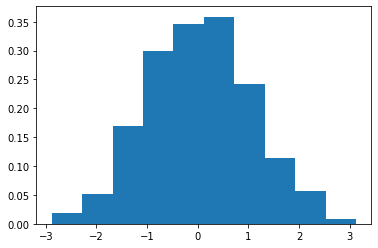

In [37]:
plt.hist(sample,density=True)
plt.show()

In [47]:
np.mean(sample**2)*np.sqrt(2*np.pi) #Taking the average of x**2 and multiplying the norma

2.66749390205379

The evaluated answer is very close to the theoretical value of $\sqrt(2\pi)$

In [48]:
#Plotting the correlation function

def func(x):
    return x**2

def fifik(x,N,k):
    sum = 0
    for i in range(N-k):
        sum = sum + func(x[i])*func(x[i+k])
    
    return sum/(N-k)

def C(x,N,k):
    
    fav = np.mean(func(x))
    favsq = np.mean(func(x)**2)
    
    return (fifik(x,N,k) - fav**2) / (favsq - fav**2)

In [49]:
np.size(sample)

2000

In [50]:
steps = np.arange(1,200)
Clist = []

for k in steps:
    Clist.append(C(sample,2000,k))
    


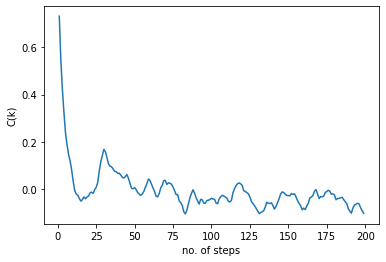

In [54]:
plt.plot(steps,Clist)
plt.xlabel("no. of steps")
plt.ylabel("C(k)")
plt.show()

## 5.3 Ising Model

In [55]:
def initial(N): #function to initalise the spins randomly
    
    state = 2*np.random.randint(2,size=(N,N))-1
    return state

In [56]:
initial(10)

array([[-1, -1,  1, -1, -1,  1, -1,  1,  1,  1],
       [ 1, -1,  1, -1, -1, -1,  1, -1,  1,  1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1, -1],
       [-1,  1, -1,  1, -1, -1, -1,  1, -1,  1],
       [-1, -1, -1, -1, -1,  1, -1, -1, -1, -1],
       [ 1, -1, -1,  1,  1,  1, -1,  1,  1, -1],
       [ 1, -1,  1,  1, -1, -1, -1, -1, -1,  1],
       [-1, -1,  1,  1,  1, -1, -1, -1,  1,  1],
       [-1,  1,  1,  1,  1, -1,  1,  1, -1,  1],
       [ 1,  1,  1,  1, -1,  1, -1, -1, -1,  1]])

In [57]:
def mcstep(states,beta,B): #A Metropolis step in this monte carlo simulation
    
    for i in range(N):
        for j in range(N):
            ind1 = np.random.randint(0,N) #randomly select a state to flip it
            ind2 = np.random.randint(0,N)
            s = states[ind1,ind2]
            DS = states[(ind1+1)%N,ind2] + states[ind1,(ind2+1)%N] + states[(ind1-1)%N,ind2] + states[ind1,(ind2-1)%N]
            dE = 2*s*(DS+B)
            
            if dE<0:
                s = s*(-1)
                
            elif np.random.rand()<np.exp(-dE*beta):
                s = s*(-1)
            
            states[ind1,ind2] = s
            
    return states


In [58]:
def Energy(states,B): #function that returns the energy of a given configuration
    E = 0
    
    for i in range(len(states)):
        for j in range(len(states)):
            S = states[i,j]
            DS = states[(i+1)%N,j] + states[i,(j+1)%N] + states[(i-1)%N,j] + states[i,(j-1)%N]
            E = E + (-(DS+B)*S)
    return E/4

In [59]:
def Mag(states): #function to evaluate the magnatization
    m = np.sum(states)
    return m

In [60]:
nt      = 32         #  number of temperature points
N       = 10         #  size of the lattice(N x N)
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt); 

E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)

n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 

In [61]:
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initial(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):           # equilibrate
        mcstep(config, iT,0)           # Monte Carlo moves
    
    
    for i in range(mcSteps):
        mcstep(config, iT,0) 
        Ene = Energy(config,0)   # calculate the energy
        mag = Mag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + mag
        M2 = M2 + mag*mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2 #specific heat capacity
    X[tt] = (n1*M2 - n2*M1*M1)*iT  #susceptibiltiy

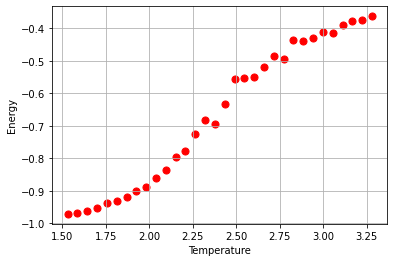

In [63]:
plt.scatter(T, E, s=50, marker='o', color='Red')
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.grid()

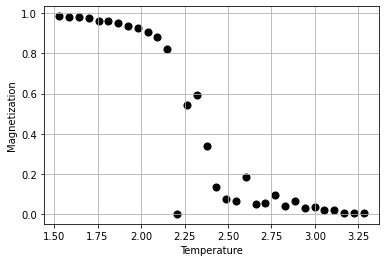

In [65]:
plt.scatter(T, abs(M), s=50, marker='o', color='Black')
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.grid()

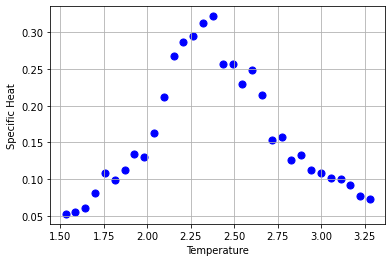

In [66]:
plt.scatter(T,C, s=50, marker='o', color='Blue')
plt.xlabel("Temperature")
plt.ylabel("Specific Heat")
plt.grid()

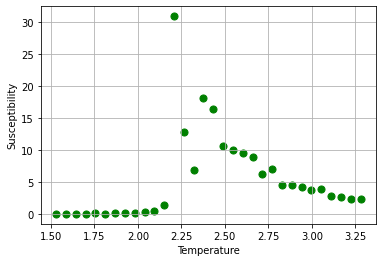

In [69]:
plt.scatter(T,X, s=50, marker='o', color='Green')
plt.xlabel("Temperature")
plt.ylabel("Susceptibility")
plt.grid()

The singularities encountered above indicates the presence of a phase transition in the 2D Ising Model